<a href="https://colab.research.google.com/github/GabrielAzpitarte/Machine-learning-projects/blob/main/Spotipy_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Découverte de l'API Spotify
Nous allons utiliser la bibliothèque spotipy pour pouvoir accèder aux informations sur Spotify.

Quelques liens utiles :
*   [Bases pour créer une app](https://sites.google.com/magicmakers.fr/teen-python/projets-dexploration/r%C3%A9seaux-sociaux/spotify/cr%C3%A9er-son-compte?authuser=0)
*   [Liste des points d'accès](https://developer.spotify.com/documentation/web-api/reference/#/)
*   [Dashboard Spotify](https://developer.spotify.com/dashboard/)
*   [Documentation Spotipy](https://spotipy.readthedocs.io/en/latest/#)

#Premiers pas sur Spotipy

In [ ]:
#On commence par installer la bibliothèque :
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 140 kB 7.8 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 236 kB 55.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


On va commencer par tester les premiers codes présentés sur spotipy.

ATTENTION : il faudra qu'on ajoute les variables d'environnement permettant d'authentifier notre app

Le Redirect URI doit aussi être ajoutée sur l'App dans le [dashboard de Spotify Developer](https://developer.spotify.com/dashboard/)
![spotyApp.png](https://cdn.glitch.global/f7e65008-b50c-4946-a7ee-62cb6a2ef0de/spotiApp.png?v=1669308763867)

In [ ]:
import os

#On "mémorise" la clé publique de notre app
os.environ["SPOTIPY_CLIENT_ID"] = "code"
#on fait de même pour la clé privée
os.environ["SPOTIPY_CLIENT_SECRET"] = "code"
#on va rajouter également le Redirect URI
os.environ["SPOTIPY_REDIRECT_URI"] = "http://localhost:9090"

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#URI pour l'artiste Birdy (on peut aussi chercher d'autres artistes en changeant l'identifant à la base)
birdy_uri = 'spotify:artist:0OcclcP5o8VKH2TRqSY2A7'

#On accède aux données
#spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

#On a besoin de définir se que notre app va pouvoir faire
scope = "user-library-read playlist-modify-public playlist-modify-private playlist-read-private"

#On crée l'objet Spotify en s'authentifiant et en n'oubliant pas de ne pas ouvrir un onglet seul
spotify = spotipy.Spotify(
        auth_manager=spotipy.SpotifyOAuth(
          client_id='code',
          client_secret='code',
          redirect_uri='http://localhost:9090',
          scope=scope, open_browser=False))

#Il va chercher les albums correspondants à l'aide de la fonction artist_albums
#permettant de renvoyer le premier album
#il faut utiliser la fonction next pour avoir accès aux albums suivants !!!
results = spotify.artist_albums(birdy_uri, album_type='album')
albums = results['items']
while results['next']:
    results = spotify.next(results)
    albums.extend(results['items'])

#On montre le nom de tous les albums
for album in albums:
    print(album['name'])


Go to the following URL: https://accounts.spotify.com/authorize?client_id=3a5b02ef907f420390aa814c3fc84449&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A9090&scope=user-library-read+playlist-modify-public+playlist-modify-private+playlist-read-private
Enter the URL you were redirected to: http://localhost:9090/?code=AQAsnf_KXjhX-XjEPKCDbGNiluzB9eBGnCnASmpPfWrSj8cj5o6c0LfoFeaUyqkg4DcaJKY9mXeqbEAJAbQY4FhdP13_oozy5pDSAsCNX4AGCfIGfQfmhoTe9GdxhkK0sJV2JJ2zHlEhrT5Z5TaIDyMLehzc3ed1hcaoTi25dAQJ9Mp2j1hR0x9h_N7YwP2AOrhUeArF-kdfxlvrN2rHykxEqvdYUDLJrG8E49azemIhb9U0iK0cfwvqEKxGuPX31nU3LFVwLURCZ2AmWCkLf3cQNeY
The Pale Blue Eye (Soundtrack from the Netflix Film)
Crimes of the Future (Original Motion Picture Soundtrack)
Pieces Of A Woman (Music From The Netflix Film)
Funny Boy (Original Motion Picture Soundtrack)
The Song of Names (Original Motion Picture Soundtrack)
Howard Shore: Two Concerti
A Palace Upon the Ruins (Selected Works)
Denial (Original Motion Picture Soundtrack)
Spotlight (Orig

#Les audio_features
Ce sont des données qui sont utilisées pour "catégoriser" les différentes pistes : [Doc Spotify sur les audio features](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features)

In [ ]:
import os

#On "mémorise" la clé publique de notre app
os.environ["SPOTIPY_CLIENT_ID"] = "code"
#on fait de même pour la clé privée
os.environ["SPOTIPY_CLIENT_SECRET"] = "code"
#on va rajouter également le Redirect URI
os.environ["SPOTIPY_REDIRECT_URI"] = "http://localhost:9090"

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Identifiant de Led Zeppelin
lz_uri = 'spotify:artist:36QJpDe2go2KgaRleHCDTp'

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

#On cherche les pistes préférées de l'artiste avec artist_top_tracks
results = spotify.artist_top_tracks(lz_uri)

#On print le nom, un extrait et l'image de l'album
for track in results['tracks'][:10]:
    print('track    : ' + track['name'])
    print('audio    : ' + track['preview_url'])
    print('cover art: ' + track['album']['images'][0]['url'])
    print()

track    : Stairway to Heaven - Remaster
audio    : https://p.scdn.co/mp3-preview/fc80a280376d5142c888475bd8fdcd00b4fc8d7d?cid=41eb10f574714a02a67046ec6db7c25f
cover art: https://i.scdn.co/image/ab67616d0000b273c8a11e48c91a982d086afc69

track    : Immigrant Song - Remaster
audio    : https://p.scdn.co/mp3-preview/e5910b86cc788766388cca1c494094e39186aa1e?cid=41eb10f574714a02a67046ec6db7c25f
cover art: https://i.scdn.co/image/ab67616d0000b27390a50cfe99a4c19ff3cbfbdb

track    : Whole Lotta Love - 1990 Remaster
audio    : https://p.scdn.co/mp3-preview/f3765a6c5b194302c6e7fffc31ba21e2bd616cf6?cid=41eb10f574714a02a67046ec6db7c25f
cover art: https://i.scdn.co/image/ab67616d0000b273fc4f17340773c6c3579fea0d

track    : Black Dog - Remaster
audio    : https://p.scdn.co/mp3-preview/f82af31817a7ec198a709e68f0f0f9edfc9a7e81?cid=41eb10f574714a02a67046ec6db7c25f
cover art: https://i.scdn.co/image/ab67616d0000b273c8a11e48c91a982d086afc69

track    : Rock and Roll - Remaster
audio    : https://p.scdn.

In [ ]:
print(results["tracks"])
print(len(results["tracks"]))

[{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/36QJpDe2go2KgaRleHCDTp'}, 'href': 'https://api.spotify.com/v1/artists/36QJpDe2go2KgaRleHCDTp', 'id': '36QJpDe2go2KgaRleHCDTp', 'name': 'Led Zeppelin', 'type': 'artist', 'uri': 'spotify:artist:36QJpDe2go2KgaRleHCDTp'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/44Ig8dzqOkvkGDzaUof9lK'}, 'href': 'https://api.spotify.com/v1/albums/44Ig8dzqOkvkGDzaUof9lK', 'id': '44Ig8dzqOkvkGDzaUof9lK', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b273c8a11e48c91a982d086afc69', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/ab67616d00001e02c8a11e48c91a982d086afc69', 'width': 300}, {'height': 64, 'url': 'https://i.scdn.co/image/ab67616d00004851c8a11e48c91a982d086afc69', 'width': 64}], 'name': 'Led Zeppelin IV (Deluxe Edition)', 'release_date': '1971-11-08', 'release_date_precision': 'day', 'total_tracks': 16, 'type': 'album', 'uri': 'spot

[Fonction audio_features](https://spotipy.readthedocs.io/en/latest/?highlight=audio_features#spotipy.client.Spotify.audio_features)

In [ ]:
#On veut récupérer les ID des pistes pour l'utiliser avec la fonction audio_features()
#print(results["tracks"][5]["id"])
tracks_id = []

for track in results["tracks"]:
  print(track["id"])
  tracks_id.append(track["id"])

print()
print(tracks_id)

5CQ30WqJwcep0pYcV4AMNc
78lgmZwycJ3nzsdgmPPGNx
0hCB0YR03f6AmQaHbwWDe8
3qT4bUD1MaWpGrTwcvguhb
4PRGxHpCpF2yoOHYKQIEwD
3MODES4TNtygekLl146Dxd
6Vjk8MNXpQpi0F4BefdTyq
0QwZfbw26QeUoIy82Z2jYp
70gbuMqwNBE2Y5rkQJE9By
4ItljeeAXtHsnsnnQojaO2

['5CQ30WqJwcep0pYcV4AMNc', '78lgmZwycJ3nzsdgmPPGNx', '0hCB0YR03f6AmQaHbwWDe8', '3qT4bUD1MaWpGrTwcvguhb', '4PRGxHpCpF2yoOHYKQIEwD', '3MODES4TNtygekLl146Dxd', '6Vjk8MNXpQpi0F4BefdTyq', '0QwZfbw26QeUoIy82Z2jYp', '70gbuMqwNBE2Y5rkQJE9By', '4ItljeeAXtHsnsnnQojaO2']


On va pouvoir utiliser audio_features

In [ ]:
data_lz = spotify.audio_features(tracks=tracks_id)

print(data_lz)

[{'danceability': 0.338, 'energy': 0.34, 'key': 9, 'loudness': -12.049, 'mode': 0, 'speechiness': 0.0339, 'acousticness': 0.58, 'instrumentalness': 0.0032, 'liveness': 0.116, 'valence': 0.197, 'tempo': 82.433, 'type': 'audio_features', 'id': '5CQ30WqJwcep0pYcV4AMNc', 'uri': 'spotify:track:5CQ30WqJwcep0pYcV4AMNc', 'track_href': 'https://api.spotify.com/v1/tracks/5CQ30WqJwcep0pYcV4AMNc', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5CQ30WqJwcep0pYcV4AMNc', 'duration_ms': 482830, 'time_signature': 4}, {'danceability': 0.564, 'energy': 0.932, 'key': 11, 'loudness': -10.068, 'mode': 1, 'speechiness': 0.0554, 'acousticness': 0.013, 'instrumentalness': 0.169, 'liveness': 0.349, 'valence': 0.619, 'tempo': 112.937, 'type': 'audio_features', 'id': '78lgmZwycJ3nzsdgmPPGNx', 'uri': 'spotify:track:78lgmZwycJ3nzsdgmPPGNx', 'track_href': 'https://api.spotify.com/v1/tracks/78lgmZwycJ3nzsdgmPPGNx', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/78lgmZwycJ3nzsdgmPPGNx', 'durati

Pour pouvoir entraîner des réseraux de neurones, ça va être compliqué avec des tableaux de dictionnaires.

On va utiliser pandas pour la convertir en DataFrame

In [ ]:
import pandas as pd

data_lz = pd.DataFrame.from_records(data_lz)

data_lz.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.00000,10.000000,10.000000
mean,0.452300,0.705800,7.300000,-10.242100,0.700000,0.091210,0.280518,0.038355,0.172120,0.61690,105.02530,290055.500000,3.900000
std,0.078395,0.245761,3.301515,2.579046,0.483046,0.112788,0.312279,0.061499,0.125906,0.21095,34.08563,124290.502795,0.316228
min,0.317000,0.265000,2.000000,-15.913000,0.000000,0.033300,0.000582,0.000029,0.051200,0.19700,78.04400,146250.000000,3.000000
25%,0.418250,0.609000,5.250000,-11.541750,0.250000,0.034800,0.040750,0.000523,0.083025,0.53050,81.65375,214261.000000,4.000000
50%,0.472000,0.790500,9.000000,-9.630000,1.000000,0.052550,0.167000,0.002890,0.102550,0.60650,91.66200,263040.500000,4.000000
75%,0.498000,0.898250,9.000000,-8.543500,1.000000,0.087400,0.438000,0.041600,0.237750,0.75200,109.31000,324266.500000,4.000000
max,0.564000,0.932000,11.000000,-7.292000,1.000000,0.405000,0.943000,0.169000,0.405000,0.88600,169.61300,517125.000000,4.000000


In [ ]:
data_lz.sample(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
9,0.525,0.929,9,-8.560,0,0.0784,0.262000,0.000029,0.0754,0.556,163.503,audio_features,4ItljeeAXtHsnsnnQojaO2,spotify:track:4ItljeeAXtHsnsnnQojaO2,https://api.spotify.com/v1/tracks/4ItljeeAXtHs...,https://api.spotify.com/v1/audio-analysis/4Itl...,262748,4
2,0.412,0.902,9,-11.600,1,0.4050,0.048400,0.131000,0.4050,0.422,89.740,audio_features,0hCB0YR03f6AmQaHbwWDe8,spotify:track:0hCB0YR03f6AmQaHbwWDe8,https://api.spotify.com/v1/tracks/0hCB0YR03f6A...,https://api.spotify.com/v1/audio-analysis/0hCB...,333893,4
6,0.483,0.615,2,-8.538,1,0.0497,0.452000,0.000414,0.0512,0.594,80.576,audio_features,6Vjk8MNXpQpi0F4BefdTyq,spotify:track:6Vjk8MNXpQpi0F4BefdTyq,https://api.spotify.com/v1/tracks/6Vjk8MNXpQpi...,https://api.spotify.com/v1/audio-analysis/6Vjk...,517125,3
7,0.476,0.717,9,-9.192,1,0.0949,0.038200,0.000076,0.0818,0.753,93.584,audio_features,0QwZfbw26QeUoIy82Z2jYp,spotify:track:0QwZfbw26QeUoIy82Z2jYp,https://api.spotify.com/v1/tracks/0QwZfbw26QeU...,https://api.spotify.com/v1/audio-analysis/0QwZ...,166267,4
1,0.564,0.932,11,-10.068,1,0.0554,0.013000,0.169000,0.3490,0.619,112.937,audio_features,78lgmZwycJ3nzsdgmPPGNx,spotify:track:78lgmZwycJ3nzsdgmPPGNx,https://api.spotify.com/v1/tracks/78lgmZwycJ3n...,https://api.spotify.com/v1/audio-analysis/78lg...,146250,4
0,0.338,0.340,9,-12.049,0,0.0339,0.580000,0.003200,0.1160,0.197,82.433,audio_features,5CQ30WqJwcep0pYcV4AMNc,spotify:track:5CQ30WqJwcep0pYcV4AMNc,https://api.spotify.com/v1/tracks/5CQ30WqJwcep...,https://api.spotify.com/v1/audio-analysis/5CQ3...,482830,4
5,0.468,0.607,9,-11.367,1,0.0336,0.072000,0.000852,0.2250,0.886,98.429,audio_features,3MODES4TNtygekLl146Dxd,spotify:track:3MODES4TNtygekLl146Dxd,https://api.spotify.com/v1/tracks/3MODES4TNtyg...,https://api.spotify.com/v1/audio-analysis/3MOD...,263333,4
8,0.503,0.265,2,-15.913,1,0.0333,0.943000,0.045000,0.0867,0.522,78.044,audio_features,70gbuMqwNBE2Y5rkQJE9By,spotify:track:70gbuMqwNBE2Y5rkQJE9By,https://api.spotify.com/v1/tracks/70gbuMqwNBE2...,https://api.spotify.com/v1/audio-analysis/70gb...,212161,4
3,0.437,0.864,4,-7.842,0,0.0904,0.396000,0.031400,0.2420,0.749,81.394,audio_features,3qT4bUD1MaWpGrTwcvguhb,spotify:track:3qT4bUD1MaWpGrTwcvguhb,https://api.spotify.com/v1/tracks/3qT4bUD1MaWp...,https://api.spotify.com/v1/audio-analysis/3qT4...,295387,4
4,0.317,0.887,9,-7.292,1,0.0375,0.000582,0.002580,0.0891,0.871,169.613,audio_features,4PRGxHpCpF2yoOHYKQIEwD,spotify:track:4PRGxHpCpF2yoOHYKQIEwD,https://api.spotify.com/v1/tracks/4PRGxHpCpF2y...,https://api.spotify.com/v1/audio-analysis/4PRG...,220561,4


##Récupération et formatage en dataframe

In [ ]:
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

#On "mémorise" la clé publique de notre app
os.environ["SPOTIPY_CLIENT_ID"] = "41eb10f574714a02a67046ec6db7c25f"
#on fait de même pour la clé privée
os.environ["SPOTIPY_CLIENT_SECRET"] = "ad3b48f39e2a413d8faa12daee42be83"
#on va rajouter également le Redirect URI
os.environ["SPOTIPY_REDIRECT_URI"] = "http://localhost:9090"

#Identifiant de l'artiste
lz_uri = 'spotify:artist:1WCtifE7fVHhwqMitDEUbj'

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())
results = spotify.artist_top_tracks(lz_uri)

#On veut récupérer les ID des pistes pour l'utiliser avec la fonction audio_features()
#print(results["tracks"][5]["id"])
tracks_id = []

for track in results["tracks"]:
  tracks_id.append(track["id"])

data_lz = spotify.audio_features(tracks=tracks_id)
data_lz = pd.DataFrame.from_records(data_lz)

data_lz.describe()

742z9K7d4ghOA7p2ZXUwHw
1gRDMfXubtYLJmF8xxHCvd
4Eg2HcjUP0xBQgKZuNRe1Y
6LtELFNwWiuFd8Hr2udmFj
3hL5i6JJuw2RqWKw3WF4kl
5NmdJeCbJCw12PQ7c5hNqq
4Ml5pxQA4sMeafES7uBRGR
1HO3DaEoZSFwyPpUo9tMMb
31vY8kZO2upVDIlMijXMLd
7xDU0qQJpfkKuPm0BNGGej


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.521400,0.66320,3.000000,-8.271300,0.700000,0.199200,0.207118,0.000293,0.248570,0.572900,132.617800,196465.400000,4.000000
std,0.164813,0.20662,4.027682,3.826511,0.483046,0.233281,0.273651,0.000561,0.181374,0.180391,35.674928,105398.318255,0.471405
min,0.239000,0.28800,0.000000,-15.572000,0.000000,0.042200,0.000276,0.000000,0.039700,0.313000,53.082000,33933.000000,3.000000
25%,0.428750,0.60325,0.000000,-8.071000,0.250000,0.050650,0.007475,0.000000,0.136000,0.419000,125.351000,162440.000000,4.000000
50%,0.506500,0.72500,1.000000,-6.848000,1.000000,0.068750,0.100550,0.000032,0.178500,0.610500,139.446500,203426.500000,4.000000
75%,0.634500,0.80075,5.750000,-5.910250,1.000000,0.279250,0.273250,0.000368,0.344500,0.669750,145.796500,248526.500000,4.000000
max,0.777000,0.85800,10.000000,-5.129000,1.000000,0.670000,0.768000,0.001800,0.655000,0.924000,175.953000,356560.000000,5.000000


#Réseau de neurones Jeux Vidéos vs Hardrock

In [ ]:
#On commence par installer la bibliothèque :
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 236 kB 66.5 MB/s 
     |████████████████████████████████| 140 kB 80.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


##Connexion à l'API Spotipy + Identifiants

In [ ]:
import spotipy

#identifiant du compte
user_id = "31gqgxu4n4m7imy3ym3tb5vqaspm"

#identifiants des playlists
playlist_JV_id = "3iXyA8MxmJOsIiLYFSbBnn"
playlist_rock_id = "5fvYONFdESJIPeY520tTQA"

#Paramètrage des autorisations de l'API
scope = "user-library-read playlist-modify-public playlist-modify-private playlist-read-private"

#On règle l'authentification
authentification = spotipy.SpotifyOAuth(
          client_id='41eb10f574714a02a67046ec6db7c25f',
          client_secret='ad3b48f39e2a413d8faa12daee42be83',
          redirect_uri='http://localhost:9090',
          scope=scope, open_browser=False)

#Création de l'objet Spotify
spotify = spotipy.Spotify(auth_manager=authentification)


##Récupération des id des tracks des playlists

In [ ]:
results = spotify.user_playlist_tracks(user_id,playlist_JV_id)
print(results)

#on peut récupérer les infos de la 1ère track
tracks = results["items"]
print(tracks)

#Tant qu'il existe une track suivante, on la rajoute à tracks
while results["next"]:
  #On passe à la track suivante
  results = spotify.next(results)
  #On ajoute le nouveau results["items"] à tracks
  tracks.extend(results["items"])

print(len(tracks),tracks[10])

#On crée une liste des identifiants des tracks pour pouvoir récupérer leurs audio_features
tracks_JV_id = []
#On fait une boucle sur tous les éléments de la liste tracks
for track in tracks:
  tracks_JV_id.append(track["track"]["id"])

print(tracks_JV_id)

Go to the following URL: https://accounts.spotify.com/authorize?client_id=41eb10f574714a02a67046ec6db7c25f&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A9090&scope=user-library-read+playlist-modify-public+playlist-modify-private+playlist-read-private
Enter the URL you were redirected to: http://localhost:9090/?code=AQDEhi_VETc5Jo86vEcm8-WCju_u9kk_EPHxVy9Mf3P_r3pG9KPbsaU-O77X9CbE-kQ75gRhI7QrtJYErN4tp6SpDhggkIbrcCpFlUUNbQdR8CV_KrtI8RdbDPGVLFNvt18PtRptDZOHVBos5XIs_ZrWfSvTOBPLUIVURH5l242vFWoJWZdo9b49fzXQ2-KMKjFXIlWteeJfK7YoAkjPH8FNurcJbO-Fm2DKiAX9RpRDbB5wMtlmbOdVWLdehZuy3RThJi8ruJJacAE-0dWB9Umy4ZY
{'href': 'https://api.spotify.com/v1/playlists/3iXyA8MxmJOsIiLYFSbBnn/tracks?offset=0&limit=100&additional_types=track', 'items': [{'added_at': '2022-11-26T13:15:39Z', 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/31gqgxu4n4m7imy3ym3tb5vqaspm'}, 'href': 'https://api.spotify.com/v1/users/31gqgxu4n4m7imy3ym3tb5vqaspm', 'id': '31gqgxu4n4m7imy3ym3tb5vqaspm', 'typ

In [ ]:
results = spotify.user_playlist_tracks(user_id,playlist_rock_id)
print(results)

#on peut récupérer les infos de la 1ère track
tracks = results["items"]
print(tracks)

#Tant qu'il existe une track suivante, on la rajoute à tracks
while results["next"]:
  #On passe à la track suivante
  results = spotify.next(results)
  #On ajoute le nouveau results["items"] à tracks
  tracks.extend(results["items"])

print(len(tracks),tracks[10])

#On crée une liste des identifiants des tracks pour pouvoir récupérer leurs audio_features
tracks_rock_id = []
#On fait une boucle sur tous les éléments de la liste tracks
for track in tracks:
  tracks_rock_id.append(track["track"]["id"])

print(tracks_rock_id)

{'href': 'https://api.spotify.com/v1/playlists/5fvYONFdESJIPeY520tTQA/tracks?offset=0&limit=100&additional_types=track', 'items': [{'added_at': '2022-11-26T13:23:29Z', 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/31gqgxu4n4m7imy3ym3tb5vqaspm'}, 'href': 'https://api.spotify.com/v1/users/31gqgxu4n4m7imy3ym3tb5vqaspm', 'id': '31gqgxu4n4m7imy3ym3tb5vqaspm', 'type': 'user', 'uri': 'spotify:user:31gqgxu4n4m7imy3ym3tb5vqaspm'}, 'is_local': False, 'primary_color': None, 'track': {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/711MCceyCBcFnzjGY4Q7Un'}, 'href': 'https://api.spotify.com/v1/artists/711MCceyCBcFnzjGY4Q7Un', 'id': '711MCceyCBcFnzjGY4Q7Un', 'name': 'AC/DC', 'type': 'artist', 'uri': 'spotify:artist:711MCceyCBcFnzjGY4Q7Un'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA

##Récupération des audio_features et conversion en DataFrame

In [ ]:
#tqdm permet de montrer la progression de la boucle
from tqdm import tqdm
import pandas as pd

#On crée un tableau vide
data_JV = []

#On fait une boucle sur les tracks ID
for track in tqdm(tracks_JV_id):
  #on récupère les features de la track
  data = spotify.audio_features(tracks=track)

  #On l'ajoute à data_JV
  data_JV.extend(data)

#On va pouvoir convertir en dataframe Pandas
data_JV = pd.DataFrame.from_records(data_JV)

#On affiche les infos
data_JV.info()

100%|██████████| 190/190 [00:09<00:00, 19.78it/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      190 non-null    float64
 1   energy            190 non-null    float64
 2   key               190 non-null    int64  
 3   loudness          190 non-null    float64
 4   mode              190 non-null    int64  
 5   speechiness       190 non-null    float64
 6   acousticness      190 non-null    float64
 7   instrumentalness  190 non-null    float64
 8   liveness          190 non-null    float64
 9   valence           190 non-null    float64
 10  tempo             190 non-null    float64
 11  type              190 non-null    object 
 12  id                190 non-null    object 
 13  uri               190 non-null    object 
 14  track_href        190 non-null    object 
 15  analysis_url      190 non-null    object 
 16  duration_ms       190 non-null    int64  
 1

In [ ]:
data_JV.sample(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
155,0.153,0.0419,7,-28.817,0,0.0331,0.83800,0.74900,0.1270,0.0352,135.718,audio_features,30AUSRHR6eLmFsQ0DKx0l8,spotify:track:30AUSRHR6eLmFsQ0DKx0l8,https://api.spotify.com/v1/tracks/30AUSRHR6eLm...,https://api.spotify.com/v1/audio-analysis/30AU...,130351,4
97,0.536,0.1260,11,-16.798,0,0.0365,0.98700,0.87400,0.1480,0.2630,65.029,audio_features,1Rzcy9ayDB28kvEBnsMZen,spotify:track:1Rzcy9ayDB28kvEBnsMZen,https://api.spotify.com/v1/tracks/1Rzcy9ayDB28...,https://api.spotify.com/v1/audio-analysis/1Rzc...,175933,4
127,0.341,0.2970,7,-21.278,0,0.0405,0.94300,0.87100,0.0991,0.3010,74.985,audio_features,6VrX52VugtvrrMdSsexmQa,spotify:track:6VrX52VugtvrrMdSsexmQa,https://api.spotify.com/v1/tracks/6VrX52Vugtvr...,https://api.spotify.com/v1/audio-analysis/6VrX...,75807,4
45,0.204,0.2160,7,-15.976,1,0.0301,0.95800,0.96600,0.1140,0.1010,98.869,audio_features,6JJ4bNUb6UQjXW5MYTw2b9,spotify:track:6JJ4bNUb6UQjXW5MYTw2b9,https://api.spotify.com/v1/tracks/6JJ4bNUb6UQj...,https://api.spotify.com/v1/audio-analysis/6JJ4...,158493,4
172,0.344,0.3220,5,-13.320,0,0.0341,0.76700,0.00125,0.1630,0.3090,125.598,audio_features,0YLgGBRButs1WcfNPtbHBs,spotify:track:0YLgGBRButs1WcfNPtbHBs,https://api.spotify.com/v1/tracks/0YLgGBRButs1...,https://api.spotify.com/v1/audio-analysis/0YLg...,457013,4
67,0.587,0.6560,11,-14.290,0,0.0524,0.92100,0.80400,0.2940,0.9160,120.029,audio_features,31gtSbYHFsFn5zKWnsxlxu,spotify:track:31gtSbYHFsFn5zKWnsxlxu,https://api.spotify.com/v1/tracks/31gtSbYHFsFn...,https://api.spotify.com/v1/audio-analysis/31gt...,145227,3
154,0.227,0.4360,4,-14.047,0,0.0486,0.49800,0.26800,0.1450,0.1670,140.006,audio_features,6NZwk4ZLDWPh8hbeHfJAoA,spotify:track:6NZwk4ZLDWPh8hbeHfJAoA,https://api.spotify.com/v1/tracks/6NZwk4ZLDWPh...,https://api.spotify.com/v1/audio-analysis/6NZw...,249776,4
108,0.450,0.7810,7,-9.619,1,0.0350,0.00877,0.81200,0.2040,0.5870,124.956,audio_features,41nCDHpwQO1aL4epZuNwMW,spotify:track:41nCDHpwQO1aL4epZuNwMW,https://api.spotify.com/v1/tracks/41nCDHpwQO1a...,https://api.spotify.com/v1/audio-analysis/41nC...,165600,3
22,0.213,0.3280,11,-9.622,0,0.0373,0.95500,0.82300,0.1210,0.0367,68.981,audio_features,7v6wRCSOzdFtwg4HLdKjga,spotify:track:7v6wRCSOzdFtwg4HLdKjga,https://api.spotify.com/v1/tracks/7v6wRCSOzdFt...,https://api.spotify.com/v1/audio-analysis/7v6w...,75893,4
131,0.341,0.1900,11,-23.789,1,0.0326,0.92000,0.97700,0.1020,0.1190,87.899,audio_features,413nwu2q5SEHtiHFXRkhgZ,spotify:track:413nwu2q5SEHtiHFXRkhgZ,https://api.spotify.com/v1/tracks/413nwu2q5SEH...,https://api.spotify.com/v1/audio-analysis/413n...,128131,4


In [ ]:
#On crée un tableau vide
data_rock = []

#On fait une boucle sur les tracks ID
for track in tqdm(tracks_rock_id):
  #on récupère les features de la track
  data = spotify.audio_features(tracks=track)

  #On l'ajoute à data_JV
  data_rock.extend(data)

#On va pouvoir convertir en dataframe Pandas
data_rock = pd.DataFrame.from_records(data_rock)

#On affiche les infos
data_rock.info()

100%|██████████| 151/151 [00:04<00:00, 32.81it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      151 non-null    float64
 1   energy            151 non-null    float64
 2   key               151 non-null    int64  
 3   loudness          151 non-null    float64
 4   mode              151 non-null    int64  
 5   speechiness       151 non-null    float64
 6   acousticness      151 non-null    float64
 7   instrumentalness  151 non-null    float64
 8   liveness          151 non-null    float64
 9   valence           151 non-null    float64
 10  tempo             151 non-null    float64
 11  type              151 non-null    object 
 12  id                151 non-null    object 
 13  uri               151 non-null    object 
 14  track_href        151 non-null    object 
 15  analysis_url      151 non-null    object 
 16  duration_ms       151 non-null    int64  
 1

##Analyse rapidos des DataFrames

Description Audio Features : https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

In [ ]:
data_JV.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.375176,0.349427,4.807692,-14.874621,0.483516,0.042753,0.594709,0.763545,0.140317,0.236799,114.464665,169945.884615,3.752747
std,0.195198,0.210367,3.451534,4.710220,0.501107,0.018957,0.358585,0.267280,0.070123,0.234546,34.869013,87905.640933,0.603277
min,0.000000,0.002460,0.000000,-30.635000,0.000000,0.000000,0.000060,0.000000,0.041200,0.000000,0.000000,9773.000000,0.000000
25%,0.207500,0.188500,2.000000,-16.791250,0.000000,0.034225,0.264500,0.743000,0.099475,0.054275,84.368250,124988.000000,4.000000
50%,0.361500,0.314000,5.000000,-14.203000,0.000000,0.038100,0.724500,0.871000,0.114000,0.152000,113.782500,155820.000000,4.000000
75%,0.524750,0.464750,8.000000,-11.441750,1.000000,0.044150,0.922500,0.926000,0.159750,0.336750,139.904250,200730.000000,4.000000
max,0.877000,0.929000,11.000000,-6.361000,1.000000,0.171000,0.996000,0.997000,0.453000,0.947000,199.960000,865867.000000,5.000000


In [ ]:
data_rock.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,0.432282,0.806128,5.429530,-7.447040,0.711409,0.071491,0.101008,0.181360,0.307611,0.455944,122.126564,310204.000000,3.919463
std,0.112496,0.177859,3.341498,2.717582,0.454635,0.049203,0.198994,0.262984,0.291953,0.211042,26.778526,114056.008933,0.339252
min,0.112000,0.263000,0.000000,-18.419000,0.000000,0.025700,0.000007,0.000000,0.041500,0.070900,70.968000,63360.000000,1.000000
25%,0.336000,0.759000,2.000000,-8.832000,0.000000,0.039700,0.000647,0.002190,0.102000,0.311000,98.918000,232648.000000,4.000000
50%,0.451000,0.859000,6.000000,-7.023000,1.000000,0.060100,0.007910,0.033600,0.174000,0.427000,122.930000,285053.000000,4.000000
75%,0.511000,0.932000,9.000000,-5.370000,1.000000,0.086700,0.080300,0.317000,0.359000,0.605000,139.496000,360867.000000,4.000000
max,0.679000,0.994000,11.000000,-1.914000,1.000000,0.424000,0.949000,0.962000,0.974000,0.944000,197.304000,881800.000000,4.000000


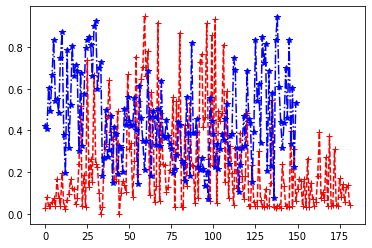

In [ ]:
from matplotlib import pyplot as plt

plt.plot(data_JV['valence'],'r+--',data_rock['valence'],'b*-.')

On va utiliser en entrée du réseau de neurones :
*   Energy
*   loudness
*   acousticness
*   instrumentalness

##Préparation des données

0 : étiquette Jeux Vidéos

1 : étiquette Rock

In [ ]:
#Pour créer et manipuler des tenseurs :
import numpy as np
#Pour manipuler les étiquettes :
from tensorflow.keras.utils import to_categorical
#Pour séparer les données d'entraînement et d'évaluation
from sklearn.model_selection import train_test_split

##On commence par gérer les sorties
#On récupère les longueurs des 2 DataFrames
count_JV = data_JV.shape[0]
count_rock = data_rock.shape[0]

#print(count_JV)
#On crée le tableau Y vide
Y=[]

#on va remplir Y à l'aide de 2 boucles
for element in range(count_JV):
  Y.append(0)
for element in range(count_rock):
  Y.append(1)

#print(Y)

#on utilise la fonction to_categorical() pour transformer les données en vecteurs de probabilités
Y = to_categorical(Y, 2)

In [ ]:
print(Y.shape)

(331, 2)


In [ ]:
#On concatène les 2 DataFrames en un seul
donnees_manip = pd.concat([data_JV,data_rock])

##On s'occupe des entrées
X = donnees_manip[['energy','loudness','acousticness','instrumentalness','liveness','speechiness','valence']]

#On va convertir en tenseur numpy avec la fonction np.asarray() et on va aussi convertir en nombre décimaux
X = np.asarray(X).astype("float32")

##Il nous reste plus qu'à splitter les données avec train_test_split()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

#On regarde si ça a bien marché :
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(272, 7)
(272, 2)
(69, 7)
(69, 2)


##Réseau de neurones

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

modele = Sequential()

#On va mettre une couche Dense de neurones en entrée
modele.add(Dense(64,input_shape=(7,),activation="relu"))

#on met ensuite une seconde couche intermédiaire
modele.add(Dense(32,activation="relu"))

modele.add(Dense(32,activation="relu"))

#On va mettre une couche Dense de sortie
modele.add(Dense(2, activation="softmax"))

modele.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                512       
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 2)                 66        
                                                                 
Total params: 3,714
Trainable params: 3,714
Non-trainable params: 0
_________________________________________________________________


##Apprentissage

In [ ]:
#On va paramétrer son entrainement :
modele.compile(optimizer="Adam",loss="categorical_crossentropy", metrics=["accuracy"])

#On va lancer l'entraînement
modele.fit(X_train, Y_train, batch_size = 16, epochs = 20, validation_data=(X_test,Y_test))

modele.save("spotifIA.h5")

Epoch 1/20
17/17 [==============================] - 1s 16ms/step - loss: 0.6262 - accuracy: 0.5809 - val_loss: 0.6323 - val_accuracy: 0.5072
Epoch 2/20
17/17 [==============================] - 0s 5ms/step - loss: 0.5550 - accuracy: 0.6434 - val_loss: 0.5543 - val_accuracy: 0.7391
Epoch 3/20
17/17 [==============================] - 0s 5ms/step - loss: 0.4978 - accuracy: 0.7941 - val_loss: 0.4982 - val_accuracy: 0.7391
Epoch 4/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4434 - accuracy: 0.8419 - val_loss: 0.4235 - val_accuracy: 0.8551
Epoch 5/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3952 - accuracy: 0.8713 - val_loss: 0.3948 - val_accuracy: 0.8261
Epoch 6/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3618 - accuracy: 0.8750 - val_loss: 0.3273 - val_accuracy: 0.8696
Epoch 7/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3129 - accuracy: 0.8750 - val_loss: 0.2913 - val_accuracy: 0.8986
Epoch 8/20
17/17 [=

#Prédiction Playlists Recommandation

In [ ]:
#On commence par installer la bibliothèque :
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 140 kB 11.4 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 248 kB 41.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import spotipy

#identifiant du compte
user_id = "31gqgxu4n4m7imy3ym3tb5vqaspm"

#identifiants des playlists
playlist_JVvsRock_id = "13A5mPC5L3M7R6fNstT99O"
playlist_JVia_id = "3gfNkUs7Cu9NVTlqPxBegs"
playlist_rockia_id = "2TJ2TghhhbVD4s5kUubaUQ"

#Paramètrage des autorisations de l'API
scope = "user-library-read playlist-modify-public playlist-modify-private playlist-read-private"

#On règle l'authentification
authentification = spotipy.SpotifyOAuth(
          client_id='41eb10f574714a02a67046ec6db7c25f',
          client_secret='ad3b48f39e2a413d8faa12daee42be83',
          redirect_uri='http://localhost:9090',
          scope=scope, open_browser=False)

#Création de l'objet Spotify
spotify = spotipy.Spotify(auth_manager=authentification)

In [ ]:
results = spotify.user_playlist_tracks(user_id,playlist_JVvsRock_id)
print(results)

#on peut récupérer les infos de la 1ère track
tracks = results["items"]
print(tracks)

#Tant qu'il existe une track suivante, on la rajoute à tracks
while results["next"]:
  #On passe à la track suivante
  results = spotify.next(results)
  #On ajoute le nouveau results["items"] à tracks
  tracks.extend(results["items"])

print(len(tracks),tracks[10])

#On crée une liste des identifiants des tracks pour pouvoir récupérer leurs audio_features
tracks_id = []
#On fait une boucle sur tous les éléments de la liste tracks
for track in tracks:
  tracks_id.append(track["track"]["id"])

print(tracks_id)

{'href': 'https://api.spotify.com/v1/playlists/13A5mPC5L3M7R6fNstT99O/tracks?offset=0&limit=100&additional_types=track', 'items': [{'added_at': '2022-11-26T13:30:08Z', 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/31gqgxu4n4m7imy3ym3tb5vqaspm'}, 'href': 'https://api.spotify.com/v1/users/31gqgxu4n4m7imy3ym3tb5vqaspm', 'id': '31gqgxu4n4m7imy3ym3tb5vqaspm', 'type': 'user', 'uri': 'spotify:user:31gqgxu4n4m7imy3ym3tb5vqaspm'}, 'is_local': False, 'primary_color': None, 'track': {'album': {'album_type': 'compilation', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0LyfQWJT6nXafLPZqxe9Of'}, 'href': 'https://api.spotify.com/v1/artists/0LyfQWJT6nXafLPZqxe9Of', 'id': '0LyfQWJT6nXafLPZqxe9Of', 'name': 'Various Artists', 'type': 'artist', 'uri': 'spotify:artist:0LyfQWJT6nXafLPZqxe9Of'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS',

In [ ]:
from keras.models import load_model
import numpy as np
import pandas as pd

#On récupère notre prédicteur
predicteur = load_model("spotifIA.h5")

#On fait une boucle sur chaque track_id pour prédire sa catégorie
for track in tracks_id :
  #on récupère les audio_features de la track et on les convertir en DataFrame
  features = spotify.audio_features(tracks = track)
  features = pd.DataFrame.from_records(features)

  X = features[['energy','loudness','acousticness','instrumentalness','liveness','speechiness','valence']]
  #On va convertir en tenseur numpy avec la fonction np.asarray() et on va aussi convertir en nombre décimaux
  X = np.asarray(X).astype("float32")

  #On va pouvoir prédire la catégorie
  prediction = predicteur.predict(X)
  categorie = np.argmax(prediction)

  #Pour rajouter une track à une playlist, on utilise son URI
  track_URI = ["spotify:track:"+track]

  #Si la catégorie est 0, on met la track dans la playlist JV
  if categorie == 0 :
    #on utilise la fonction user_playlist_add_tracks
    spotify.user_playlist_add_tracks(user = user_id, playlist_id = playlist_JVia_id, tracks = track_URI)
    print(track, " est un JV")
  else :
    #on utilise la fonction user_playlist_add_tracks
    spotify.user_playlist_add_tracks(user = user_id, playlist_id = playlist_rockia_id, tracks = track_URI)
    print(track, " est un Hardrock")

1/1 [==============================] - 0s 92ms/step
5NP9bhvIp2XGY3Xl0ICAub  est un JV
1/1 [==============================] - 0s 18ms/step
7oQxntBpX9Fh6kO8njQpke  est un JV
1/1 [==============================] - 0s 17ms/step
3fuHB4VSGd3DPq7sKsI6yE  est un JV
1/1 [==============================] - 0s 18ms/step
0f9CBU81AcH0AdqSqMSrZm  est un JV
1/1 [==============================] - 0s 18ms/step
5PhBCnQEVHGSl6IVe0fw3C  est un JV
1/1 [==============================] - 0s 21ms/step
5UkccMx1Y0ExLemNixIwSD  est un JV
1/1 [==============================] - 0s 19ms/step
3EjIPdJSl4tfIdHp484oZS  est un JV
1/1 [==============================] - 0s 18ms/step
4tK4Z83bohNtZEWdoevmAq  est un JV
1/1 [==============================] - 0s 18ms/step
0zjpp2tStzya7aMc7EqEhw  est un JV
1/1 [==============================] - 0s 20ms/step
6rkKJB8vv5z7boRVVIIOiB  est un JV
1/1 [==============================] - 0s 20ms/step
7o0rRKDeKbf75sJFpWL2LD  est un JV
1/1 [==============================] - 0s 17ms/step
6Q

##Vider la playlist des tracks
Pour supprimer toutes les tracks d'une playlist, il faut récupérer tous les identifiants des tracks de la playlist puis utiliser la fonction user_playlist_remove_all_occurences_of_tracks()

In [ ]:
results = spotify.user_playlist_tracks(user_id,playlist_JVia_id)
#print(results)

#on peut récupérer les infos de la 1ère track
tracks = results["items"]
#print(tracks)

#Tant qu'il existe une track suivante, on la rajoute à tracks
while results["next"]:
  #On passe à la track suivante
  results = spotify.next(results)
  #On ajoute le nouveau results["items"] à tracks
  tracks.extend(results["items"])

print(len(tracks),tracks[10])

#On crée une liste des identifiants des tracks pour pouvoir les supprimer
tracks_id = []
#On fait une boucle sur tous les éléments de la liste tracks
for track in tracks:
  #on vérifie que la track_id ne soit pas déjà dans la liste
  if track["track"]["id"] not in tracks_id:
    tracks_id.append(track["track"]["id"])

spotify.user_playlist_remove_all_occurrences_of_tracks(user=user_id,playlist_id=playlist_JVia_id,tracks=tracks_id)

35 {'added_at': '2022-12-17T13:40:31Z', 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/31gqgxu4n4m7imy3ym3tb5vqaspm'}, 'href': 'https://api.spotify.com/v1/users/31gqgxu4n4m7imy3ym3tb5vqaspm', 'id': '31gqgxu4n4m7imy3ym3tb5vqaspm', 'type': 'user', 'uri': 'spotify:user:31gqgxu4n4m7imy3ym3tb5vqaspm'}, 'is_local': False, 'primary_color': None, 'track': {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4hFBhdNVZZuVk5FYThUwaN'}, 'href': 'https://api.spotify.com/v1/artists/4hFBhdNVZZuVk5FYThUwaN', 'id': '4hFBhdNVZZuVk5FYThUwaN', 'name': 'アトラスサウンドチーム', 'type': 'artist', 'uri': 'spotify:artist:4hFBhdNVZZuVk5FYThUwaN'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ',

{'snapshot_id': 'MTM4LGE3MzE0Y2RkM2QwYTExYjBjOGZhOTgyMGUxZWM3ZDRjZmFiMWEyZTA='}

In [ ]:
results = spotify.user_playlist_tracks(user_id,playlist_rockia_id)
#print(results)

#on peut récupérer les infos de la 1ère track
tracks = results["items"]
#print(tracks)

#Tant qu'il existe une track suivante, on la rajoute à tracks
while results["next"]:
  #On passe à la track suivante
  results = spotify.next(results)
  #On ajoute le nouveau results["items"] à tracks
  tracks.extend(results["items"])

print(len(tracks),tracks[10])

#On crée une liste des identifiants des tracks pour pouvoir récupérer leurs audio_features
tracks_id = []
#On fait une boucle sur tous les éléments de la liste tracks
for track in tracks:
  if track["track"]["id"] not in tracks_id:
    tracks_id.append(track["track"]["id"])

#On supprime les tracks avec remove_all_occurences of tracks
spotify.user_playlist_remove_all_occurrences_of_tracks(user=user_id,playlist_id=playlist_rockia_id,tracks=tracks_id)

50 {'added_at': '2022-12-17T13:40:37Z', 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/31gqgxu4n4m7imy3ym3tb5vqaspm'}, 'href': 'https://api.spotify.com/v1/users/31gqgxu4n4m7imy3ym3tb5vqaspm', 'id': '31gqgxu4n4m7imy3ym3tb5vqaspm', 'type': 'user', 'uri': 'spotify:user:31gqgxu4n4m7imy3ym3tb5vqaspm'}, 'is_local': False, 'primary_color': None, 'track': {'album': {'album_type': 'compilation', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0LyfQWJT6nXafLPZqxe9Of'}, 'href': 'https://api.spotify.com/v1/artists/0LyfQWJT6nXafLPZqxe9Of', 'id': '0LyfQWJT6nXafLPZqxe9Of', 'name': 'Various Artists', 'type': 'artist', 'uri': 'spotify:artist:0LyfQWJT6nXafLPZqxe9Of'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', '

{'snapshot_id': 'MjM3LDQ2YmRjNjBjZWViNDhmNDMxMGY3ZjkxMGU5NjBlOWU4NjVjMDUwNTk='}

#On peut faire la même chose avec le Daily Mix

In [ ]:
#On commence par installer la bibliothèque :
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 140 kB 11.4 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 248 kB 41.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import spotipy

#identifiant du compte
user_id = "31gqgxu4n4m7imy3ym3tb5vqaspm"

#identifiants des playlists
playlist_JVvsRock_id = "37i9dQZF1EfKPiaQv6F08y"
playlist_JVia_id = "3gfNkUs7Cu9NVTlqPxBegs"
playlist_rockia_id = "2TJ2TghhhbVD4s5kUubaUQ"

#Paramètrage des autorisations de l'API
scope = "user-library-read playlist-modify-public playlist-modify-private playlist-read-private"

#On règle l'authentification
authentification = spotipy.SpotifyOAuth(
          client_id='41eb10f574714a02a67046ec6db7c25f',
          client_secret='ad3b48f39e2a413d8faa12daee42be83',
          redirect_uri='http://localhost:9090',
          scope=scope, open_browser=False)

#Création de l'objet Spotify
spotify = spotipy.Spotify(auth_manager=authentification)

In [ ]:
results = spotify.user_playlist_tracks(user_id,playlist_JVvsRock_id)
print(results)

#on peut récupérer les infos de la 1ère track
tracks = results["items"]
print(tracks)

#Tant qu'il existe une track suivante, on la rajoute à tracks
while results["next"]:
  #On passe à la track suivante
  results = spotify.next(results)
  #On ajoute le nouveau results["items"] à tracks
  tracks.extend(results["items"])

print(len(tracks),tracks[10])

#On crée une liste des identifiants des tracks pour pouvoir récupérer leurs audio_features
tracks_id = []
#On fait une boucle sur tous les éléments de la liste tracks
for track in tracks:
  tracks_id.append(track["track"]["id"])

print(tracks_id)

{'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1EfKPiaQv6F08y/tracks?offset=0&limit=100&additional_types=track', 'items': [{'added_at': '1970-01-01T00:00:00Z', 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'}, 'href': 'https://api.spotify.com/v1/users/', 'id': '', 'type': 'user', 'uri': 'spotify:user:'}, 'is_local': False, 'primary_color': None, 'track': {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5UUG83KSlqPhrBssrducWV'}, 'href': 'https://api.spotify.com/v1/artists/5UUG83KSlqPhrBssrducWV', 'id': '5UUG83KSlqPhrBssrducWV', 'name': 'Spotify', 'type': 'artist', 'uri': 'spotify:artist:5UUG83KSlqPhrBssrducWV'}], 'available_markets': ['FR'], 'external_urls': {'spotify': 'https://open.spotify.com/album/7F6q2YyEzP7ugqZhxfwouD'}, 'href': 'https://api.spotify.com/v1/albums/7F6q2YyEzP7ugqZhxfwouD', 'id': '7F6q2YyEzP7ugqZhxfwouD', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d00

In [ ]:
print(track['track'])

{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5AEG63ajney2BoDXi0Vb84'}, 'href': 'https://api.spotify.com/v1/artists/5AEG63ajney2BoDXi0Vb84', 'id': '5AEG63ajney2BoDXi0Vb84', 'name': 'Bad Company', 'type': 'artist', 'uri': 'spotify:artist:5AEG63ajney2BoDXi0Vb84'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'ET', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KM', 'KN', 'KR', 'KW', 'KZ', 'LA', 'LB', 'LC', 'LI', 'LK', 'LR', 'LS', 'LT', 'LU', 'LV', 'LY', 'MA', 'MC', 'MD', 'ME', 'MG', 'MK', 'ML', 'MN', 'MO', 'MR', 'MT

In [ ]:
features = spotify.audio_features(tracks = ['7DJfHRZpmaUeLXRfnX3vZv'])
print(features)

[{'danceability': 0.506, 'energy': 0.0369, 'key': 0, 'loudness': -22.903, 'mode': 1, 'speechiness': 0.0533, 'acousticness': 0.989, 'instrumentalness': 0.961, 'liveness': 0.0804, 'valence': 0.0508, 'tempo': 143.791, 'type': 'audio_features', 'id': '7DJfHRZpmaUeLXRfnX3vZv', 'uri': 'spotify:track:7DJfHRZpmaUeLXRfnX3vZv', 'track_href': 'https://api.spotify.com/v1/tracks/7DJfHRZpmaUeLXRfnX3vZv', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7DJfHRZpmaUeLXRfnX3vZv', 'duration_ms': 75653, 'time_signature': 4}]


In [ ]:
from keras.models import load_model
import numpy as np
import pandas as pd

#On récupère notre prédicteur
predicteur = load_model("spotifIA.h5")

#On fait une boucle sur chaque track_id pour prédire sa catégorie
for track in tracks_id :
  #on récupère les audio_features de la track et on les convertir en DataFrame
  features = spotify.audio_features(tracks = track)

  #On vérifie l'existence des audiofeatures pour passer à la suite
  if features[0] :
    features = pd.DataFrame.from_records(features)

    X = features[['energy','loudness','acousticness','instrumentalness']]
    #On va convertir en tenseur numpy avec la fonction np.asarray() et on va aussi convertir en nombre décimaux
    X = np.asarray(X).astype("float32")

    #On va pouvoir prédire la catégorie
    prediction = predicteur.predict(X)
    categorie = np.argmax(prediction)

    #Pour rajouter une track à une playlist, on utilise son URI
    track_URI = ["spotify:track:"+track]

    #Si la catégorie est 0, on met la track dans la playlist JV
    if categorie == 0 :
      #on utilise la fonction user_playlist_add_tracks
      spotify.user_playlist_add_tracks(user = user_id, playlist_id = playlist_JVia_id, tracks = track_URI)
      print(track, " est un JV")
    else :
      #on utilise la fonction user_playlist_add_tracks
      spotify.user_playlist_add_tracks(user = user_id, playlist_id = playlist_rockia_id, tracks = track_URI)
      print(track, " est un Hardrock")

1/1 [==============================] - 0s 65ms/step
7DJfHRZpmaUeLXRfnX3vZv  est un JV
1/1 [==============================] - 0s 19ms/step
0f2eQFGrKeWOZU1gXJBejH  est un JV
1/1 [==============================] - 0s 18ms/step
6KLMBNFLnz4MgaYyKwVqwO  est un JV
1/1 [==============================] - 0s 19ms/step
2XhGiYKILtbcv9rkMkobpT  est un JV
1/1 [==============================] - 0s 49ms/step
1ILLl6eVrDGh1EdgSca9uM  est un JV
1/1 [==============================] - 0s 26ms/step
3g3ilubl68qMd1i15ky9WA  est un JV
1/1 [==============================] - 0s 17ms/step
3q98LozxmzfSqwmZrZ3iHS  est un JV
1/1 [==============================] - 0s 19ms/step
7vFGzP82IzNbNz2CSEQHUs  est un JV
1/1 [==============================] - 0s 16ms/step
6is8O0NV3moGc2eV0WbCtV  est un JV
1/1 [==============================] - 0s 16ms/step
6ebNn9bRWksrrrWotc6xcV  est un JV
1/1 [==============================] - 0s 20ms/step
3CKtGTXN63jyc4Z1zwvTdz  est un JV
1/1 [==============================] - 0s 17ms/step
1N

#Récupérer toutes les playlists Daily Mix et créer une playlist Hard Rock

https://medium.com/codex/decoding-spotify-daily-mix-73f4783037b4

Il faut commencer par liker toutes les playlists

In [ ]:
#On commence par installer la bibliothèque :
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 140 kB 11.4 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 248 kB 41.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import spotipy

#identifiant du compte
user_id = "31gqgxu4n4m7imy3ym3tb5vqaspm"

#Paramètrage des autorisations de l'API
scope = "user-library-read playlist-modify-public playlist-modify-private playlist-read-private"

#On règle l'authentification
authentification = spotipy.SpotifyOAuth(
          client_id='41eb10f574714a02a67046ec6db7c25f',
          client_secret='ad3b48f39e2a413d8faa12daee42be83',
          redirect_uri='http://localhost:9090',
          scope=scope, open_browser=False)

#Création de l'objet Spotify
spotify = spotipy.Spotify(auth_manager=authentification)

In [ ]:
#On récupère toutes les playlists dans la bibliothèque
playlists = spotify.user_playlists(user = user_id)

#On crée une liste vide pour les id des playlists
playlists_id = []

#On crée une boucle sur les 'items' de l'objet récupéré
for playlist in playlists['items'] :
  #On ne récupère que les playlists qui ont la chaîne '37i9dQZ'
  #dans leurs identifiants
  if '37i9dQZ' in playlist['id']:
    playlists_id.append(playlist['id'])

print(playlists_id)

['37i9dQZF1EfKPiaQv6F08y', '37i9dQZF1E354Eh1fs9XYZ', '37i9dQZF1E36XawZ8BNr0X', '37i9dQZF1E35fPzgZgs9aN', '37i9dQZF1E39u3u2theesT', '37i9dQZF1E39ZdN3nSJcj5', '37i9dQZF1E35TXjJz48FOi']


In [ ]:
#Pour afficher la progression de la boucle
from tqdm import tqdm

#On crée une liste des identifiants des tracks pour pouvoir récupérer leurs audio_features
tracks_id = []

#On fait une boucle sur tous les identifiants de playlist
for playlist_id in tqdm(playlists_id):
  #On récupère les éléments de la playlist en cours
  results = spotify.user_playlist_tracks(user_id,playlist_id)

  #on peut récupérer les infos de sa 1ère track
  tracks = results["items"]

  #Tant qu'il existe une track suivante, on la rajoute à tracks
  while results["next"]:
    #On passe à la track suivante
    results = spotify.next(results)
    #On ajoute le nouveau results["items"] à tracks
    tracks.extend(results["items"])

  #On fait une boucle sur tous les éléments de la liste tracks
  for track in tracks:
    tracks_id.append(track["track"]["id"])

print()
print(len(tracks_id),tracks_id)

100%|██████████| 7/7 [00:02<00:00,  2.57it/s]


335 ['02ccJIawsUKanHns1VUb9g', '7Lls178RUphhYdZNaNIne8', '7Hk7RcCNPkBuwEOlewYc6W', '6ZDYvY4n2I6W1z6OJGsUGn', '7qZINZuRcFDnSlSLQ2mwYu', '1NpSdOfFA7XPpEKlTV4OTr', '0PJ6Hh9IAH87nLp0wJVxXY', '4Oti7gFJj6BqyRlzujmXBw', '44CgM5My2vfkSv1KAQuEfk', '7xhawRJwDY5oqDwDOQHbLR', '21trRQA61afzljSK9V0SHX', '4xAzyQOx6Wt3qiplCTM9rf', '1XnvczSoMqghcCG0L81Chp', '1spEUAxOJ96xQibks7GR5m', '3SYsei8V6SQ0cg418ifXwR', '2Ai4NZr2baS2OQxluFhZ9D', '6ugqtSObkEecqQWGLF3SsM', '4Dvkj6JhhA12EX05fT7y2e', '0PDUDa38GO8lMxLCRc4lL1', '76hfruVvmfQbw0eYn1nmeC', '1jEBSDN5vYViJQr78W7jr2', '0DzznAmOVoCNHypjqZdsHG', '4VrWlk8IQxevMvERoX08iC', '3uwnnTQcHM1rDqSfA4gQNz', '61uyGDPJ06MkxJtHgPmuyO', '6wJwkMo278iWVlWl1XQ4WA', '59RvHZFDo2hkPsAaCRDFhI', '0hVXuCcriWRGvwMV1r5Yn9', '017PF4Q3l4DBUiWoXk4OWT', '44ONERBHALxftQNWq6dmyd', '0Fx3fYbcYx3iDNrduNMlde', '3PfIrDoz19wz7qK7tYeu62', '3zkWCteF82vJwv0hRLba76', '6kex4EBAj0WHXDKZMEJaaF', '6ZANrVuAMp2rpjhfbOuJly', '49C6EGQhCUSgyADHYvJ7ez', '4vO9dmzNRqDhFY3jD1a3P7', '63OFKbMaZSDZ4wtesuuq6f', '68gpa

In [ ]:
#Création d'une nouvelle playlist
playlist_JV = spotify.user_playlist_create(user = user_id,
                                           name = "Daily Mix Jeu Vidéo",
                                           public=False,
                                           collaborative=False,
                                           description='Bla bla bla')

#On peut afficher son identifiant
print(playlist_JV['id'])

#On fait la même chose pour notre deuxième catégorie
playlist_Rock = spotify.user_playlist_create(user = user_id,
                                           name = "Daily Mix Hard Rock",
                                           public=False,
                                           collaborative=False,
                                           description='Bla bla bla')

1W6s4TJexsBsE0U1LHBoGv


In [ ]:
from keras.models import load_model
import numpy as np
import pandas as pd

#On récupère notre prédicteur
predicteur = load_model("spotifIA.h5")

#On fait une boucle sur chaque track_id pour prédire sa catégorie
for track in tracks_id :
  #on récupère les audio_features de la track et on les convertir en DataFrame
  features = spotify.audio_features(tracks = track)

  #On vérifie l'existence des audiofeatures pour passer à la suite
  if features[0] :
    features = pd.DataFrame.from_records(features)

    X = features[['energy','loudness','acousticness','instrumentalness','liveness','speechiness','valence']]
    #On va convertir en tenseur numpy avec la fonction np.asarray() et on va aussi convertir en nombre décimaux
    X = np.asarray(X).astype("float32")

    #On va pouvoir prédire la catégorie
    prediction = predicteur.predict(X)
    categorie = np.argmax(prediction)

    #Pour rajouter une track à une playlist, on utilise son URI
    track_URI = ["spotify:track:"+track]

    #Si la catégorie 0 est à 90% sûre, on met la track dans la playlist JV
    if prediction[0][0] >= 0.9 :
      #on utilise la fonction user_playlist_add_tracks
      spotify.user_playlist_add_tracks(user = user_id, playlist_id = playlist_JV['id'], tracks = track_URI)
      print(track, " est un JV")
    #Si la catégorie 1 est à 90% sûre, on met la track dans la playlist Hardrock
    elif prediction[0][1] >= 0.9 :
      #on utilise la fonction user_playlist_add_tracks
      spotify.user_playlist_add_tracks(user = user_id, playlist_id = playlist_Rock['id'], tracks = track_URI)
      print(track, " est un Hardrock")

1/1 [==============================] - 0s 19ms/step
6ZDYvY4n2I6W1z6OJGsUGn  est un JV
1/1 [==============================] - 0s 21ms/step
7qZINZuRcFDnSlSLQ2mwYu  est un JV
1/1 [==============================] - 0s 17ms/step
1NpSdOfFA7XPpEKlTV4OTr  est un JV
1/1 [==============================] - 0s 17ms/step
4Oti7gFJj6BqyRlzujmXBw  est un JV
1/1 [==============================] - 0s 17ms/step
44CgM5My2vfkSv1KAQuEfk  est un JV
1/1 [==============================] - 0s 25ms/step
7xhawRJwDY5oqDwDOQHbLR  est un JV
1/1 [==============================] - 0s 17ms/step
1XnvczSoMqghcCG0L81Chp  est un JV
1/1 [==============================] - 0s 26ms/step
3SYsei8V6SQ0cg418ifXwR  est un JV
1/1 [==============================] - 0s 19ms/step
2Ai4NZr2baS2OQxluFhZ9D  est un JV
1/1 [==============================] - 0s 17ms/step
4Dvkj6JhhA12EX05fT7y2e  est un Hardrock
1/1 [==============================] - 0s 18ms/step
0PDUDa38GO8lMxLCRc4lL1  est un Hardrock
1/1 [==============================] - 0s 

In [ ]:
print(prediction)

[[0.512791   0.48720908]]


#Création de 2 playlists à partir des featured playlists !!!

In [ ]:
#On commence par installer la bibliothèque :
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 140 kB 6.6 MB/s 
     |████████████████████████████████| 236 kB 51.1 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import spotipy

#identifiant du compte
user_id = "31gqgxu4n4m7imy3ym3tb5vqaspm"

#Paramètrage des autorisations de l'API
scope = "user-library-read playlist-modify-public playlist-modify-private playlist-read-private"

#On règle l'authentification
authentification = spotipy.SpotifyOAuth(
          client_id='41eb10f574714a02a67046ec6db7c25f',
          client_secret='ad3b48f39e2a413d8faa12daee42be83',
          redirect_uri='http://localhost:9090',
          scope=scope, open_browser=False)

#Création de l'objet Spotify
spotify = spotipy.Spotify(auth_manager=authentification)

SyntaxError: ignored

In [ ]:
results = spotify.featured_playlists(country='FR',limit=50)

for playlist in results['playlists']['items']:
  print(playlist)

{'collaborative': False, 'description': 'La playlist qui fait du bien ☀️', 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DWYRdd9noPgqB'}, 'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DWYRdd9noPgqB', 'id': '37i9dQZF1DWYRdd9noPgqB', 'images': [{'height': None, 'url': 'https://i.scdn.co/image/ab67706f000000036c8462564886be9d5c76c7b7', 'width': None}], 'name': 'Feel Good', 'owner': {'display_name': 'Spotify', 'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'}, 'href': 'https://api.spotify.com/v1/users/spotify', 'id': 'spotify', 'type': 'user', 'uri': 'spotify:user:spotify'}, 'primary_color': None, 'public': None, 'snapshot_id': 'MTY3MTU3NzIwMCwwMDAwMDAwMDk1YzcxOGRiZjY1YjZkOWQ2YTAzMmZiNDQ4NmY0NjAz', 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DWYRdd9noPgqB/tracks', 'total': 50}, 'type': 'playlist', 'uri': 'spotify:playlist:37i9dQZF1DWYRdd9noPgqB'}
{'collaborative': False, 'description': 'Le son des chichas !', 'ex

In [ ]:
#On récupère les mix français
results = spotify.featured_playlists(country='FR',limit=50)

playlists_id = []

#Pour chaque playlist, on récupère l'id et on le place dans une liste
for playlist in results['playlists']['items']:
  playlists_id.append(playlist['id'])

print(playlists_id)

['37i9dQZF1DWYRdd9noPgqB', '37i9dQZF1DX32nf7PAbnUl', '37i9dQZF1DXbS5WTN5nKF7', '37i9dQZF1DWWSuZL7uNdVA', '37i9dQZF1DWY6UWUOwj4BO', '37i9dQZF1DX9PXZbuB8BjJ', '37i9dQZF1DWVuV87wUBNwc', '37i9dQZF1DWSBZhfF4ZHr8', '37i9dQZF1DWTIfBdh7WtFL']


In [ ]:
#Pour afficher la progression de la boucle
from tqdm import tqdm

#On crée une liste des identifiants des tracks pour pouvoir récupérer leurs audio_features
tracks_id = []

#On fait une boucle sur tous les identifiants de playlist
for playlist_id in tqdm(playlists_id):
  #On récupère les éléments de la playlist en cours
  results = spotify.user_playlist_tracks(user_id,playlist_id)

  #on peut récupérer les infos de sa 1ère track
  tracks = results["items"]

  #Tant qu'il existe une track suivante, on la rajoute à tracks
  while results["next"]:
    #On passe à la track suivante
    results = spotify.next(results)
    #On ajoute le nouveau results["items"] à tracks
    tracks.extend(results["items"])

  #On fait une boucle sur tous les éléments de la liste tracks
  for track in tracks:
    tracks_id.append(track["track"]["id"])

print()
print(len(tracks_id),tracks_id)

100%|██████████| 9/9 [00:02<00:00,  4.33it/s]

450 ['0oVWbi1hUJqpRCWF8ybG6g', '0tpaVCA6VnQOUAI0EpFZpk', '2BY27TSBwYybHpRPp0tqyd', '2wa2NecZZA6eOoKwlNOTKK', '5ZKsOqztR15ukpcFGSH8VW', '7uGd2sO212d36Ja4wMlTdJ', '4HBWcKtybdLFvFQpE2kQuy', '7gZzWI6yC0Wb8xLcNYoYIg', '64dLd6rVqDLtkXFYrEUHIU', '4BBJGxUNJaioA9JrG0Fe5a', '39exKIvycQDgs4T6uXdyu0', '3PqAQRlPl0yOnqqcB6Y5Cw', '7jtdG988aYR7IkFObSWfJe', '7hLvlEgz9LoAuWcIoxxVCm', '4zi12vnfemTW9sYo3XoJ2y', '3qvEMGt9m08w9Sz1xtNhL6', '4oUwIemilFkGKeoL6HpJjs', '4T6FWA703h6H7zk1FoSARw', '0VcWp30A3hSJrPjdDEHeNE', '6kAOOamDflxqkrAWI6wZRR', '5DAkzBJ48N7z6lwY4eZ0PP', '6r836ND98CjgLGESPNV9c9', '3TBHYzTPw0Hv05hCAtTJG0', '2zx4cyrEkfZHIwJcYEHyDB', '2KnfMlqUIr2RLFIRlCQzhw', '4mBg9npq4KcXU2DkLNYJIB', '0S3BtG3i5tkQmehJhIhHF3', '3GGs5TGfMh675Tvg08VjLQ', '6NAq3eKpIXWWaCZSDqbIBM', '5LInOGDHqrgetnMlnvaDNq', '1zAITH7C5UFYNE8DOFlE7h', '0DrohBMSYcjY1hsfbvAgMd', '1e3eQPPa5LujOIZ87oY4KJ', '1epmKmAPTKRm0M8wLOvRSx', '381x7xMIdqXgCnkpoMX2X7', '5vrOwoXILW22WyXkhGLciY', '2LitWKrPsaafnbu1sRDU02', '186OcKKnKN5wjCpMAes7MO', '4BdGO1

In [ ]:
#Création d'une nouvelle playlist
playlist_JV = spotify.user_playlist_create(user = user_id,
                                           name = "JV-création App",
                                           public=False,
                                           collaborative=False,
                                           description='Bla bla bla')

#On peut afficher son identifiant
print(playlist_JV['id'])

#On fait la même chose pour notre deuxième catégorie
playlist_Rock = spotify.user_playlist_create(user = user_id,
                                           name = "Rock-création App",
                                           public=False,
                                           collaborative=False,
                                           description='Bla bla bla')

5irpEL9t0iM3miW5WO1zFc


In [ ]:
from keras.models import load_model
import numpy as np
import pandas as pd

#On récupère notre prédicteur
predicteur = load_model("spotifIA.h5")

#On fait une boucle sur chaque track_id pour prédire sa catégorie
for track in tracks_id :
  #on récupère les audio_features de la track et on les convertir en DataFrame
  features = spotify.audio_features(tracks = track)
  features = pd.DataFrame.from_records(features)

  X = features[['energy','loudness','acousticness','instrumentalness','liveness','speechiness','valence']]
  #On va convertir en tenseur numpy avec la fonction np.asarray() et on va aussi convertir en nombre décimaux
  X = np.asarray(X).astype("float32")

  #On va pouvoir prédire la catégorie
  prediction = predicteur.predict(X)
  categorie = np.argmax(prediction)

  #Pour rajouter une track à une playlist, on utilise son URI
  track_URI = ["spotify:track:"+track]

  #Si la catégorie est 0, on met la track dans la playlist JV
  if categorie == 0 :
    #on utilise la fonction user_playlist_add_tracks
    spotify.user_playlist_add_tracks(user = user_id, playlist_id = playlist_JV['id'], tracks = track_URI)
    #print(track, " est un JV")
  else :
    #on utilise la fonction user_playlist_add_tracks
    spotify.user_playlist_add_tracks(user = user_id, playlist_id = playlist_Rock['id'], tracks = track_URI)
    #print(track, " est un Hardrock")